<a href="https://colab.research.google.com/github/cocozxh/MachineLearning_UTAustin/blob/main/HW1/Eigendigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from numpy import linalg as LA

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train_reshape = np.reshape(x_train,(60000,784))

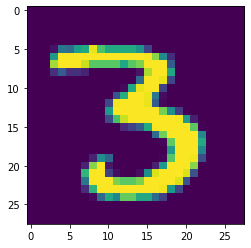

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(np.reshape(x_train_reshape[12],(28,28)))

Calculate Covariance Matrix


In [ ]:
x_mean = np.mean(x_train_reshape, axis=0)

In [ ]:
x_mean.shape

(784,)

In [ ]:
train_diff = x_train_reshape - x_mean

In [ ]:
train_diff.shape

(60000, 784)

In [ ]:
M = np.matmul(train_diff.transpose(), train_diff)

In [ ]:
M.shape

(784, 784)

Calculate Eigenvalue and Eigenvector

In [ ]:
eigenvalue, eigenvector = LA.eig(M)
eigenvalue.shape

(784,)

In [ ]:
maxValueIndex = np.argsort(np.real(eigenvalue))

In [ ]:
real_eigenvector = np.real(eigenvector)

In [ ]:
real_eigenvector.shape

(784, 784)

Select k eigenvectors corresponding to k largest eigenvalue


In [ ]:
k = 100

In [ ]:
k_maxIndex = maxValueIndex[(real_eigenvector.shape[1]-k):real_eigenvector.shape[1]]

In [ ]:
Vk = real_eigenvector[:,k_maxIndex]

In [ ]:
Vk.shape

(784, 100)

Top 8 eigenvector


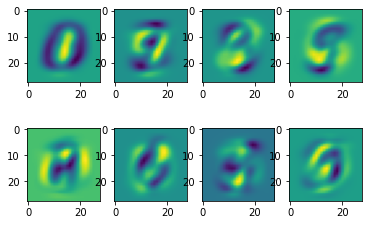

In [ ]:
import matplotlib.pyplot as plt
# import random
plt.figure()
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(np.reshape(Vk[:,100-i-1],(28,28)))
  # j = random.randint(0,100);
  # plt.imshow(np.reshape(Vk[:,j],(28,28)))

Model fit and Test

In [ ]:
x_train_reduced = np.matmul(train_diff,Vk)

In [ ]:
x_train_reduced.shape

(60000, 100)

In [ ]:
x_test_reshape = np.reshape(x_test,(10000,784))

In [ ]:
x_test_reduced = np.matmul((x_test_reshape-x_mean),Vk)

In [ ]:
x_test_reduced.shape

(10000, 100)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train_reduced,y_train)
knn.score(x_test_reduced,y_test) 

0.9713

Reconstruction Result

In [ ]:
test_reconstruct = np.matmul(x_test_reduced,Vk.transpose()) + x_mean
test_reconstruct.shape

(10000, 784)

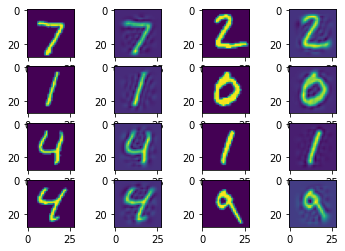

In [ ]:
import random
plt.figure()
for i in range(8):
  
  j = i;
  plt.subplot(4,4,2*i+1)
  plt.imshow(np.reshape(x_test[j],(28,28)))
  plt.subplot(4,4,2*i+2)
  plt.imshow(np.reshape(test_reconstruct[j],(28,28)))

Experiment 1 - Accuracy with M changes (select M eigenvector corresponding to M largest eigenvalue)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
M = []
accuracy = []
for k in range(1,784,30):

  k_maxIndex = maxValueIndex[(real_eigenvector.shape[1]-k):real_eigenvector.shape[1]]
  Vk = real_eigenvector[:,k_maxIndex]
  x_train_reduced = np.matmul(train_diff,Vk)
  x_test_reshape = np.reshape(x_test,(10000,784))
  x_test_reduced = np.matmul((x_test_reshape-x_mean),Vk)
  knn = KNeighborsClassifier(n_neighbors=10)
  knn.fit(x_train_reduced,y_train)
  score = knn.score(x_test_reduced,y_test)
  print(str(k)+' '+str(score))
  M.append(k)
  accuracy.append(score)

1 0.2798
31 0.975
61 0.9739
91 0.9709
121 0.9698
151 0.9687
181 0.9682
211 0.967
241 0.9678
271 0.9672
301 0.9667
331 0.966
361 0.966
391 0.9662
421 0.9662
451 0.9663
481 0.9662
511 0.9664
541 0.9665
571 0.9665
601 0.9665
631 0.9665
661 0.9665
691 0.9665


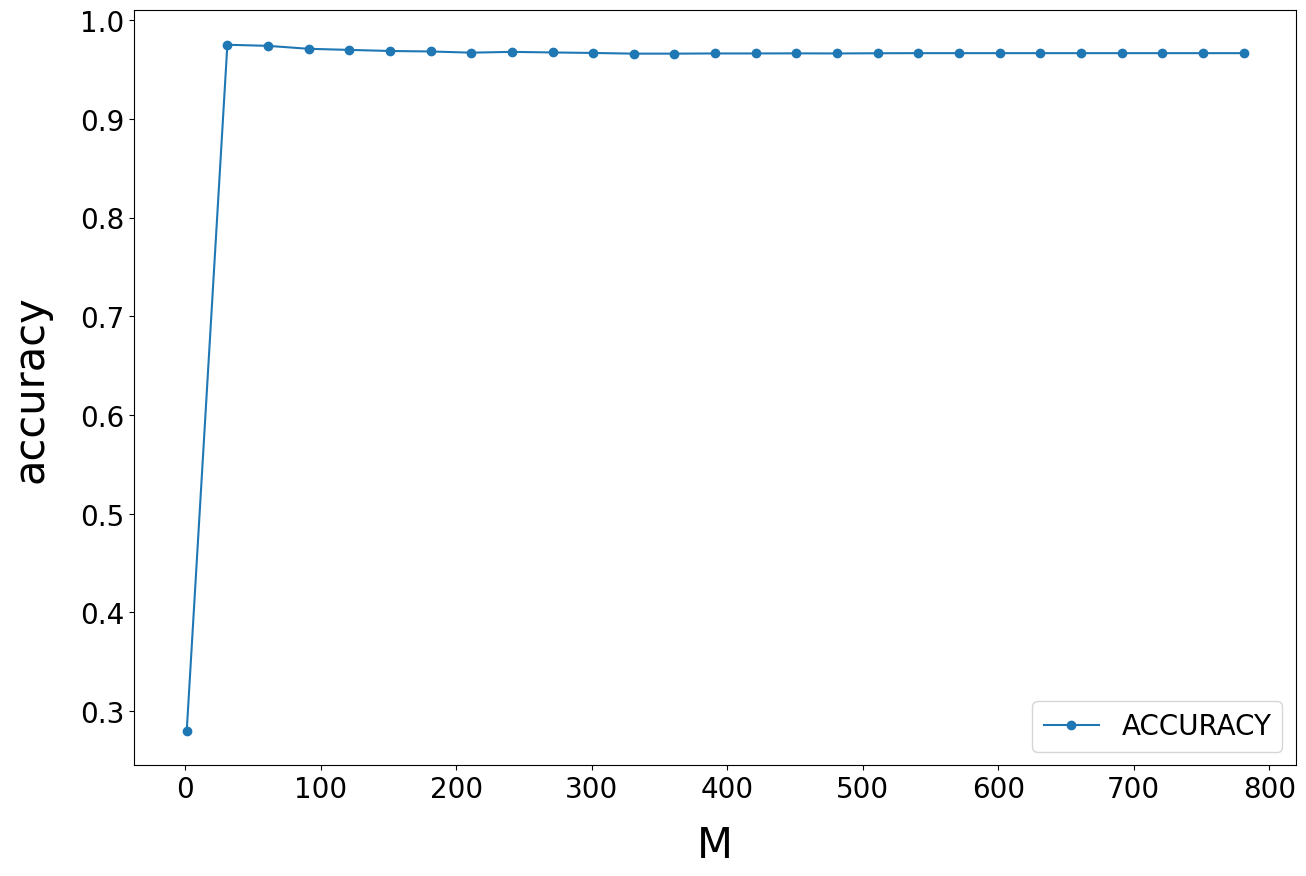

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10),dpi=100,linewidth=2)
plt.plot(M, accuracy,'o-',label="ACCURACY")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("M", fontsize=30, labelpad = 15)
plt.ylabel("accuracy", fontsize=30, labelpad = 20)
plt.legend(loc = "best", fontsize=20)
plt.show()

Experiment 2 - Accuracy with training set size change

Experiment 2.1 - k = 10

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
size=[]
acc=[]
for i in range(500,60000,500):
  resize_train_diff = train_diff[0:i,:]
  print(resize_train_diff.shape)
  M = np.matmul(resize_train_diff.transpose(), resize_train_diff)
  eigenvalue, eigenvector = LA.eig(M)
  maxValueIndex = np.argsort(np.real(eigenvalue))
  real_eigenvector = np.real(eigenvector)
  k = 10
  k_maxIndex = maxValueIndex[(real_eigenvector.shape[1]-k):real_eigenvector.shape[1]]
  Vk = real_eigenvector[:,k_maxIndex]
  x_train_reduced = np.matmul(train_diff,Vk)
  x_test_reshape = np.reshape(x_test,(10000,784))
  x_test_reduced = np.matmul((x_test_reshape-x_mean),Vk)
  knn = KNeighborsClassifier(n_neighbors=10)
  knn.fit(x_train_reduced,y_train)
  accuracy = knn.score(x_test_reduced,y_test)
  size.append(i)
  acc.append(accuracy)
  print(str(i)+' '+str(accuracy))

(500, 784)
500 0.9252
(1000, 784)
1000 0.9309
(1500, 784)
1500 0.9289
(2000, 784)
2000 0.9284
(2500, 784)
2500 0.9288
(3000, 784)
3000 0.9285
(3500, 784)
3500 0.9291
(4000, 784)
4000 0.9293
(4500, 784)
4500 0.9286
(5000, 784)
5000 0.928
(5500, 784)
5500 0.9281
(6000, 784)
6000 0.9289
(6500, 784)
6500 0.9292
(7000, 784)
7000 0.9295
(7500, 784)
7500 0.928
(8000, 784)
8000 0.9278
(8500, 784)
8500 0.9278
(9000, 784)
9000 0.9281
(9500, 784)
9500 0.9284
(10000, 784)
10000 0.9279
(10500, 784)
10500 0.9284
(11000, 784)
11000 0.9294
(11500, 784)
11500 0.9294
(12000, 784)
12000 0.9295
(12500, 784)
12500 0.9304
(13000, 784)
13000 0.9305
(13500, 784)
13500 0.9299
(14000, 784)
14000 0.93
(14500, 784)
14500 0.9293
(15000, 784)
15000 0.9285
(15500, 784)
15500 0.9288
(16000, 784)
16000 0.9284
(16500, 784)
16500 0.9295
(17000, 784)
17000 0.93
(17500, 784)
17500 0.9299
(18000, 784)
18000 0.9292
(18500, 784)
18500 0.9296
(19000, 784)
19000 0.9291
(19500, 784)
19500 0.9295
(20000, 784)
20000 0.93
(20500, 

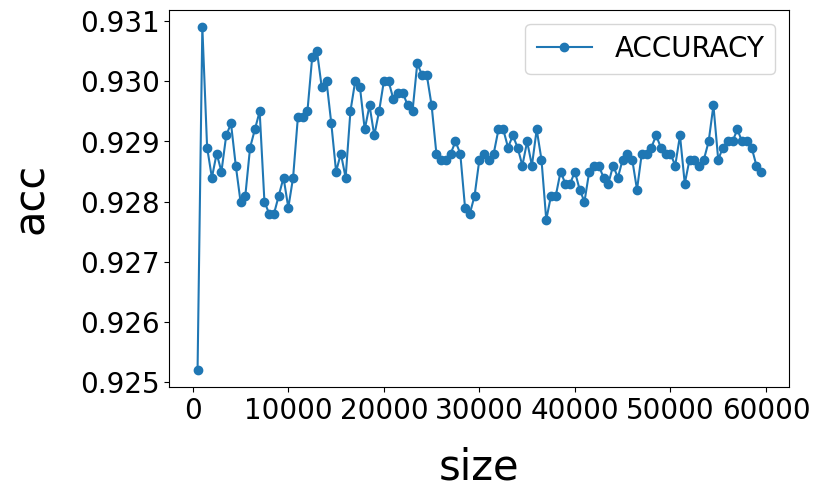

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5),dpi=100,linewidth=2)
plt.plot(size, acc,'o-',label="ACCURACY")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("size", fontsize=30, labelpad = 15)
plt.ylabel("acc", fontsize=30, labelpad = 20)
plt.legend(loc = "best", fontsize=20)
plt.show()

Experiment 2.2 - k = 30

In [ ]:
size2=[]
acc2=[]
for i in range(500,60000,500):
  resize_train_diff = train_diff[0:i,:]
  print(resize_train_diff.shape)
  M = np.matmul(resize_train_diff.transpose(), resize_train_diff)
  eigenvalue, eigenvector = LA.eig(M)
  maxValueIndex = np.argsort(np.real(eigenvalue))
  real_eigenvector = np.real(eigenvector)
  k = 30
  k_maxIndex = maxValueIndex[(real_eigenvector.shape[1]-k):real_eigenvector.shape[1]]
  Vk = real_eigenvector[:,k_maxIndex]
  x_train_reduced = np.matmul(train_diff,Vk)
  x_test_reshape = np.reshape(x_test,(10000,784))
  x_test_reduced = np.matmul((x_test_reshape-x_mean),Vk)
  knn = KNeighborsClassifier(n_neighbors=10)
  knn.fit(x_train_reduced,y_train)
  accuracy = knn.score(x_test_reduced,y_test)
  size2.append(i)
  
  acc2.append(accuracy)
  print(str(i)+' '+str(accuracy))

(500, 784)
500 0.9716
(1000, 784)
1000 0.973
(1500, 784)
1500 0.9738
(2000, 784)
2000 0.9729
(2500, 784)
2500 0.9727
(3000, 784)
3000 0.9735
(3500, 784)
3500 0.9734
(4000, 784)
4000 0.9736
(4500, 784)
4500 0.9737
(5000, 784)
5000 0.9739
(5500, 784)
5500 0.9738
(6000, 784)
6000 0.9739
(6500, 784)
6500 0.9744
(7000, 784)
7000 0.9744
(7500, 784)
7500 0.9741
(8000, 784)
8000 0.9744
(8500, 784)
8500 0.9743
(9000, 784)
9000 0.9744
(9500, 784)
9500 0.9742
(10000, 784)
10000 0.9737
(10500, 784)
10500 0.9741
(11000, 784)
11000 0.9741
(11500, 784)
11500 0.9744
(12000, 784)
12000 0.974
(12500, 784)
12500 0.9745
(13000, 784)
13000 0.9747
(13500, 784)
13500 0.9747
(14000, 784)
14000 0.9747
(14500, 784)
14500 0.9746
(15000, 784)
15000 0.9748
(15500, 784)
15500 0.9747
(16000, 784)
16000 0.9749
(16500, 784)
16500 0.9744
(17000, 784)
17000 0.9747
(17500, 784)
17500 0.9745
(18000, 784)
18000 0.9745
(18500, 784)
18500 0.9748
(19000, 784)
19000 0.9749
(19500, 784)
19500 0.9752
(20000, 784)
20000 0.9751
(2

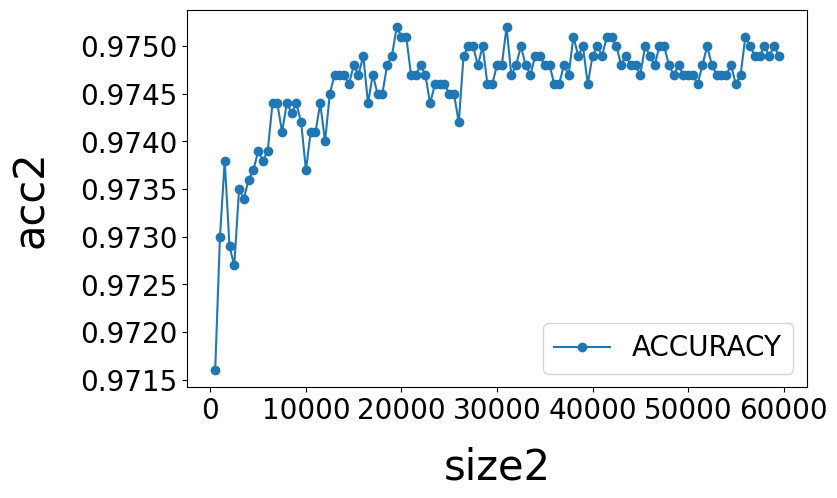

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5),dpi=100,linewidth=2)
plt.plot(size2, acc2,'o-',label="ACCURACY")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("size2", fontsize=30, labelpad = 15)
plt.ylabel("acc2", fontsize=30, labelpad = 20)
plt.legend(loc = "best", fontsize=20)
plt.show()